[참고](https://dacon.io/competitions/official/235840/codeshare/3812?page=1&dtype=recent)

## 1. Packages

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data loading

In [7]:
train = pd.read_csv('dacondata/train_wine.csv', index_col='index')
print(train.shape)
train.head()

(5497, 13)


,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,,
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [8]:
test = pd.read_csv('dacondata/test_wine.csv', index_col='index')
print(test.shape)
test.head()

(1000, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [12]:
submission = pd.read_csv("dacondata/sample_submission_wine.csv", index_col='index')
print(submission.shape)
submission.head(3)

(1000, 1)


,quality
index,
0,0
1,0
2,0


## 3. Preprocessing

### 3-0) Missing values

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 601.2+ KB


In [18]:
train.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  type                  1000 non-null   object 
dtypes: float64(11), object(1)
memory usage: 101.6+ KB


### 3-1) quality

In [21]:
train['quality'].value_counts()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

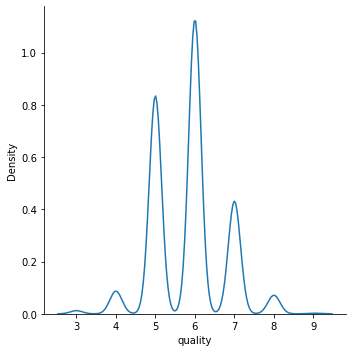

In [22]:
sns.displot(train['quality'], kind='kde')

In [23]:
train['quality'].describe()

count    5497.000000
mean        5.818992
std         0.870311
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [24]:
train.loc[train['quality'] <= 6, 'qual_grade'] = 0
train.loc[train['quality'] > 6, 'qual_grade'] = 1

In [30]:
# 빈도 및 비율 확인
train['qual_grade'].value_counts(), train['qual_grade'].value_counts(normalize=True)

(0.0    4416
 1.0    1081
 Name: qual_grade, dtype: int64,
 0.0    0.803347
 1.0    0.196653
 Name: qual_grade, dtype: float64)

### 3-2) type

In [31]:
train['type'].value_counts(normalize=True), test['type'].value_counts(normalize=True)

(white    0.756595
 red      0.243405
 Name: type, dtype: float64,
 white    0.739
 red      0.261
 Name: type, dtype: float64)

In [35]:
# train_type 값 변경
train['type(encode)'] = train['type'].replace({'white':0, 'red':1})
train['type'].value_counts(), train['type(encode)'].value_counts()

(white    4159
 red      1338
 Name: type, dtype: int64,
 0    4159
 1    1338
 Name: type(encode), dtype: int64)

In [36]:
# test_type 값 변경
test['type(encode)'] = test['type'].replace({'white':0, 'red':1})

## 4. Analysis
### 4-0) Correlation analysis

<AxesSubplot:>

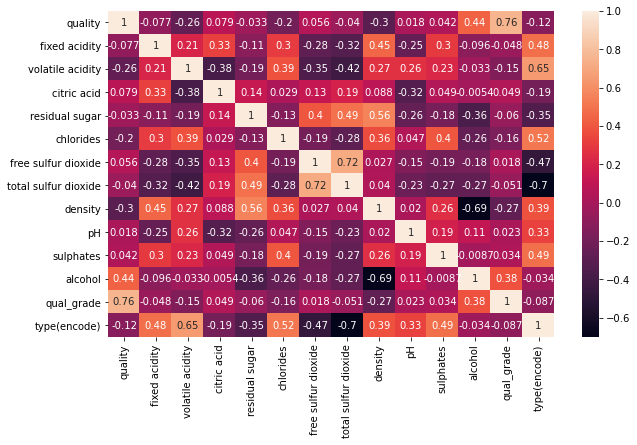

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(), annot=True)

In [39]:
train.corr()['quality']

quality                 1.000000
fixed acidity          -0.076506
volatile acidity       -0.261557
citric acid             0.079157
residual sugar         -0.032848
chlorides              -0.198148
free sulfur dioxide     0.055574
total sulfur dioxide   -0.039732
density                -0.299831
pH                      0.017931
sulphates               0.042068
alcohol                 0.439615
qual_grade              0.756656
type(encode)           -0.118280
Name: quality, dtype: float64

In [40]:
train.columns

Index(['quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type',
       'qual_grade', 'type(encode)'],
      dtype='object')

### 4-1) Visualization by each feature

<AxesSubplot:xlabel='type', ylabel='count'>

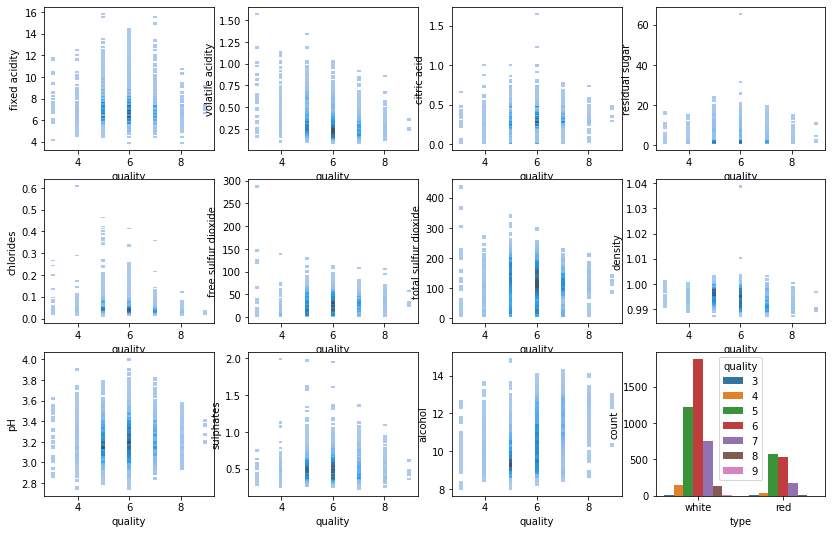

In [42]:
figure, ax = plt.subplots(3, 4)
figure.set_size_inches(14,9)

sns.histplot(data=train, y="fixed acidity", x="quality", ax=ax[0][0])
sns.histplot(data=train, y="volatile acidity", x="quality", ax=ax[0][1])
sns.histplot(data=train, y="citric acid", x="quality", ax=ax[0][2])
sns.histplot(data=train, y="residual sugar", x="quality", ax=ax[0][3])

sns.histplot(data=train, y="chlorides", x="quality", ax=ax[1][0])
sns.histplot(data=train, y="free sulfur dioxide", x="quality", ax=ax[1][1])
sns.histplot(data=train, y="total sulfur dioxide", x="quality", ax=ax[1][2])
sns.histplot(data=train, y="density", x="quality", ax=ax[1][3])

sns.histplot(data=train, y="pH", x="quality", ax=ax[2][0])
sns.histplot(data=train, y="sulphates", x="quality", ax=ax[2][1])
sns.histplot(data=train, y="alcohol", x="quality", ax=ax[2][2])
sns.countplot(data=train, x='type', hue='quality', ax=ax[2][3])

<AxesSubplot:xlabel='type', ylabel='count'>

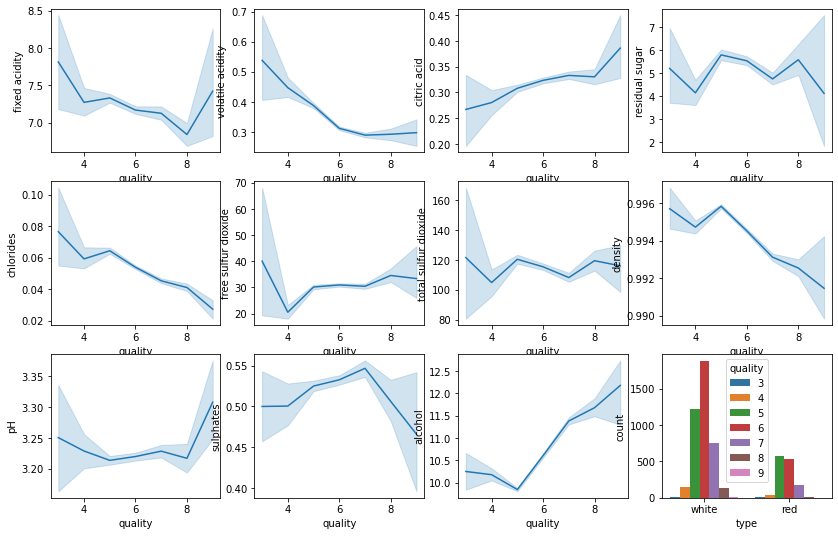

In [43]:
figure, ax = plt.subplots(3, 4)
figure.set_size_inches(14,9)

sns.lineplot(data=train, y="fixed acidity", x="quality", ax=ax[0][0])
sns.lineplot(data=train, y="volatile acidity", x="quality", ax=ax[0][1])
sns.lineplot(data=train, y="citric acid", x="quality", ax=ax[0][2])
sns.lineplot(data=train, y="residual sugar", x="quality", ax=ax[0][3])

sns.lineplot(data=train, y="chlorides", x="quality", ax=ax[1][0])
sns.lineplot(data=train, y="free sulfur dioxide", x="quality", ax=ax[1][1])
sns.lineplot(data=train, y="total sulfur dioxide", x="quality", ax=ax[1][2])
sns.lineplot(data=train, y="density", x="quality", ax=ax[1][3])

sns.lineplot(data=train, y="pH", x="quality", ax=ax[2][0])
sns.lineplot(data=train, y="sulphates", x="quality", ax=ax[2][1])
sns.lineplot(data=train, y="alcohol", x="quality", ax=ax[2][2])
sns.countplot(data=train, x='type', hue='quality', ax=ax[2][3])

### 4-3) Data Standardization (Normalization)

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [45]:
s_scaler = StandardScaler()
m_scaler = MinMaxScaler()

In [50]:
train.iloc[ : , 1:12].columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [51]:
s_col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [52]:
print(train[s_col].shape)
train[s_col].head()

(5497, 11)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
index,,,,,,,,,,,
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9
